In [7]:
import tensorflow as tf
import numpy as np

In [8]:
class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()
        # MNIST中的图像默认为uint8（0-255的数字）。以下代码将其归一化到0-1之间的浮点数，并在最后增加一维作为颜色通道
        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)        # [10000, 28, 28, 1]
        self.train_label = self.train_label.astype(np.int32)    # [60000]
        self.test_label = self.test_label.astype(np.int32)      # [10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]

    def get_batch(self, batch_size):
        # 从数据集中随机取出batch_size个元素并返回
        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]

In [13]:
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()    # Flatten层将除第一维（batch_size）以外的维度展平
        self.dense1 = tf.keras.layers.Dense(units=100, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):         # [batch_size, 28, 28, 1]
        x = self.flatten(inputs)    # [batch_size, 784]
        x = self.dense1(x)          # [batch_size, 100]
        x = self.dense2(x)          # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

In [14]:
num_epochs = 5
batch_size = 50
learning_rate = 0.001

In [15]:
model = MLP()
data_loader = MNISTLoader()
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.sparse_categorical_crossentropy,
        metrics=[tf.keras.metrics.sparse_categorical_accuracy]
    )
history = model.fit(data_loader.train_data, data_loader.train_label, epochs=num_epochs, batch_size=batch_size, )

Epoch 1/5
1200/1200 [==============================] - 16s 11ms/step - loss: 0.5041 - sparse_categorical_accuracy: 0.8586
Epoch 2/5
1200/1200 [==============================] - 10s 8ms/step - loss: 0.1409 - sparse_categorical_accuracy: 0.9599
Epoch 3/5
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9733
Epoch 4/5
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0675 - sparse_categorical_accuracy: 0.9805
Epoch 5/5
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0584 - sparse_categorical_accuracy: 0.9829


In [16]:
results = model.evaluate(data_loader.test_data, data_loader.test_label)
results

313/313 [==============================] - 3s 7ms/step - loss: 0.0786 - sparse_categorical_accuracy: 0.9754


[0.07864271849393845, 0.9753999710083008]

In [18]:
import matplotlib.pyplot as plt
history.history

{'loss': [0.29623666405677795,
  0.1310003697872162,
  0.09184753149747849,
  0.06998178362846375,
  0.05615312233567238],
 'sparse_categorical_accuracy': [0.9165499806404114,
  0.9621333479881287,
  0.9729666709899902,
  0.9795833230018616,
  0.9836000204086304]}

In [46]:
#第一步，import
import tensorflow as tf #导入模块
from sklearn import datasets #从sklearn中导入数据集
import numpy as np #导入科学计算模块
import tensorflow.keras as keras
 
#第二步，train, test
x_train = datasets.load_iris().data #导入iris数据集的输入
 
y_train = datasets.load_iris().target #导入iris数据集的标签
 
np.random.seed(120) #设置随机种子，让每次结果都一样，方便对照
 
np.random.shuffle(x_train) #使用shuffle()方法，让输入x_train乱序
 
np.random.seed(120) #设置随机种子，让每次结果都一样，方便对照
 
np.random.shuffle(y_train) #使用shuffle()方法，让输入y_train乱序
 
tf.random.set_seed(120) #让tensorflow中的种子数设置为120
 
#第三步，models.Sequential()
model = tf.keras.models.Sequential([ #使用models.Sequential()来搭建神经网络
    tf.keras.layers.Dense(10, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2()), #全连接层，三个神经元，激活函数为softmax,使用l2正则化
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Softmax()
])
 
#第四步，model.compile()
model.compile(  #使用model.compile()方法来配置训练方法
    optimizer = tf.keras.optimizers.SGD(lr = 0.1), #使用SGD优化器，学习率为0.1
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), #配置损失函数
    metrics = ['sparse_categorical_accuracy'] #标注网络评价指标
)
 
#第五步，model.fit()
history = model.fit(  #使用model.fit()方法来执行训练过程，
    x_train, y_train, #告知训练集的输入以及标签，
    batch_size = 32, #每一批batch的大小为32，
    epochs = 500, #迭代次数epochs为500
    validation_split = 0.2, #从测试集中划分80%给训练集
    validation_freq = 20 #测试的间隔次数为20
)
 
#第六步，model.summary()
model.summary() #打印神经网络结构，统计参数数目

Epoch 1/500
4/4 [==============================] - 2s 7ms/step - loss: 2.0795 - sparse_categorical_accuracy: 0.3271
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 1.4190 - sparse_categorical_accuracy: 0.3781
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 1.3234 - sparse_categorical_accuracy: 0.3523
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 1.2446 - sparse_categorical_accuracy: 0.3546
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 1.2172 - sparse_categorical_accuracy: 0.3746
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 1.1567 - sparse_categorical_accuracy: 0.3229
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 1.1293 - sparse_categorical_accuracy: 0.3454
Epoch 8/500
4/4 [==============================] - 0s 13ms/step - loss: 1.1373 - sparse_categorical_accuracy: 0.3373
Epoch 9/500
4/4 [==============================] - 0s 11ms/step - los

4/4 [==============================] - 0s 10ms/step - loss: 0.9662 - sparse_categorical_accuracy: 0.7581
Epoch 69/500
4/4 [==============================] - 0s 8ms/step - loss: 0.8615 - sparse_categorical_accuracy: 0.8994
Epoch 70/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8342 - sparse_categorical_accuracy: 0.9229
Epoch 71/500
4/4 [==============================] - 0s 10ms/step - loss: 0.9803 - sparse_categorical_accuracy: 0.6015
Epoch 72/500
4/4 [==============================] - 0s 6ms/step - loss: 1.0555 - sparse_categorical_accuracy: 0.7583
Epoch 73/500
4/4 [==============================] - 0s 8ms/step - loss: 0.8529 - sparse_categorical_accuracy: 0.8737
Epoch 74/500
4/4 [==============================] - 0s 7ms/step - loss: 1.1012 - sparse_categorical_accuracy: 0.6963
Epoch 75/500
4/4 [==============================] - 0s 7ms/step - loss: 1.0701 - sparse_categorical_accuracy: 0.6579
Epoch 76/500
4/4 [==============================] - 0s 8ms/step - loss: 0.8

4/4 [==============================] - 0s 6ms/step - loss: 0.8264 - sparse_categorical_accuracy: 0.8996
Epoch 136/500
4/4 [==============================] - 0s 6ms/step - loss: 1.0886 - sparse_categorical_accuracy: 0.8202
Epoch 137/500
4/4 [==============================] - 0s 6ms/step - loss: 0.7782 - sparse_categorical_accuracy: 0.9535
Epoch 138/500
4/4 [==============================] - 0s 6ms/step - loss: 0.7658 - sparse_categorical_accuracy: 0.9633
Epoch 139/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7688 - sparse_categorical_accuracy: 0.9075
Epoch 140/500
4/4 [==============================] - 0s 56ms/step - loss: 0.6913 - sparse_categorical_accuracy: 0.9196 - val_loss: 0.8083 - val_sparse_categorical_accuracy: 0.9333
Epoch 141/500
4/4 [==============================] - 0s 8ms/step - loss: 0.8830 - sparse_categorical_accuracy: 0.8123
Epoch 142/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7201 - sparse_categorical_accuracy: 0.9502
Epoch 14

4/4 [==============================] - 0s 6ms/step - loss: 0.8224 - sparse_categorical_accuracy: 0.9217
Epoch 203/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1346 - sparse_categorical_accuracy: 0.7183
Epoch 204/500
4/4 [==============================] - 0s 6ms/step - loss: 0.8069 - sparse_categorical_accuracy: 0.9767
Epoch 205/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7373 - sparse_categorical_accuracy: 0.9704
Epoch 206/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7133 - sparse_categorical_accuracy: 0.9540
Epoch 207/500
4/4 [==============================] - 0s 7ms/step - loss: 1.0050 - sparse_categorical_accuracy: 0.7760
Epoch 208/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7559 - sparse_categorical_accuracy: 0.9485
Epoch 209/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7712 - sparse_categorical_accuracy: 0.9335
Epoch 210/500
4/4 [==============================] - 0s 8ms/step - los

4/4 [==============================] - 0s 8ms/step - loss: 0.6543 - sparse_categorical_accuracy: 0.9633
Epoch 270/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6930 - sparse_categorical_accuracy: 0.9617
Epoch 271/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6345 - sparse_categorical_accuracy: 0.9188
Epoch 272/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6764 - sparse_categorical_accuracy: 0.9612
Epoch 273/500
4/4 [==============================] - 0s 10ms/step - loss: 0.9204 - sparse_categorical_accuracy: 0.8260
Epoch 274/500
4/4 [==============================] - 0s 9ms/step - loss: 1.1833 - sparse_categorical_accuracy: 0.7558
Epoch 275/500
4/4 [==============================] - 0s 7ms/step - loss: 0.8702 - sparse_categorical_accuracy: 0.9044
Epoch 276/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7468 - sparse_categorical_accuracy: 0.9394
Epoch 277/500
4/4 [==============================] - 0s 9ms/step - l

4/4 [==============================] - 0s 7ms/step - loss: 0.7195 - sparse_categorical_accuracy: 0.9485
Epoch 336/500
4/4 [==============================] - 0s 7ms/step - loss: 0.7317 - sparse_categorical_accuracy: 0.9650
Epoch 337/500
4/4 [==============================] - 0s 6ms/step - loss: 0.7649 - sparse_categorical_accuracy: 0.9612
Epoch 338/500
4/4 [==============================] - 0s 6ms/step - loss: 1.4910 - sparse_categorical_accuracy: 0.6179
Epoch 339/500
4/4 [==============================] - 0s 8ms/step - loss: 0.7925 - sparse_categorical_accuracy: 0.8410
Epoch 340/500
4/4 [==============================] - 0s 58ms/step - loss: 0.8502 - sparse_categorical_accuracy: 0.9283 - val_loss: 0.8189 - val_sparse_categorical_accuracy: 0.9667
Epoch 341/500
4/4 [==============================] - 0s 6ms/step - loss: 0.8852 - sparse_categorical_accuracy: 0.8733
Epoch 342/500
4/4 [==============================] - 0s 8ms/step - loss: 0.7839 - sparse_categorical_accuracy: 0.9654
Epoch 34

4/4 [==============================] - 0s 7ms/step - loss: 0.7452 - sparse_categorical_accuracy: 0.9469
Epoch 402/500
4/4 [==============================] - 0s 8ms/step - loss: 0.7556 - sparse_categorical_accuracy: 0.9773
Epoch 403/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6999 - sparse_categorical_accuracy: 0.9713
Epoch 404/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6900 - sparse_categorical_accuracy: 0.9531
Epoch 405/500
4/4 [==============================] - 0s 6ms/step - loss: 0.7297 - sparse_categorical_accuracy: 0.9785
Epoch 406/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1531 - sparse_categorical_accuracy: 0.6833
Epoch 407/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6930 - sparse_categorical_accuracy: 0.9765
Epoch 408/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1076 - sparse_categorical_accuracy: 0.7304
Epoch 409/500
4/4 [==============================] - 0s 7ms/step - los

4/4 [==============================] - 0s 11ms/step - loss: 0.7746 - sparse_categorical_accuracy: 0.9246
Epoch 468/500
4/4 [==============================] - 0s 8ms/step - loss: 0.7283 - sparse_categorical_accuracy: 0.9671
Epoch 469/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7218 - sparse_categorical_accuracy: 0.9625
Epoch 470/500
4/4 [==============================] - 0s 9ms/step - loss: 0.7853 - sparse_categorical_accuracy: 0.9627
Epoch 471/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7371 - sparse_categorical_accuracy: 0.9775
Epoch 472/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6721 - sparse_categorical_accuracy: 0.9742
Epoch 473/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8711 - sparse_categorical_accuracy: 0.8504
Epoch 474/500
4/4 [==============================] - 0s 9ms/step - loss: 0.7503 - sparse_categorical_accuracy: 0.9200
Epoch 475/500
4/4 [==============================] - 0s 10ms/step -

In [47]:
x_train.shape, y_train.shape

((150, 4), (150,))

In [48]:
history.history

{'loss': [1.9167262315750122,
  1.3963083028793335,
  1.3247488737106323,
  1.254538655281067,
  1.2144882678985596,
  1.1674425601959229,
  1.138580322265625,
  1.1192318201065063,
  1.1386946439743042,
  1.0937007665634155,
  1.0813243389129639,
  1.0743645429611206,
  1.071738600730896,
  1.0646189451217651,
  1.045695424079895,
  1.0825247764587402,
  1.0412251949310303,
  1.0286390781402588,
  1.0232199430465698,
  1.0087693929672241,
  1.0260872840881348,
  1.0072910785675049,
  0.9937226176261902,
  1.0099222660064697,
  1.0188924074172974,
  0.9783613085746765,
  0.9716012477874756,
  0.9616180658340454,
  0.9842042922973633,
  1.0101852416992188,
  0.9669749140739441,
  0.9287338256835938,
  0.9125385284423828,
  0.9223558902740479,
  1.0944104194641113,
  1.0218292474746704,
  1.0071922540664673,
  0.9566805362701416,
  0.9523071050643921,
  0.9777871370315552,
  1.0200749635696411,
  0.891160786151886,
  0.8960562348365784,
  0.9519903063774109,
  0.8993299603462219,
  0.974

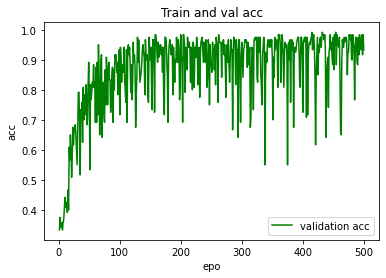

In [51]:
import matplotlib.pyplot as plt
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['sparse_categorical_accuracy']

epo = range(1, len(acc)+1)
# plt.plot(epo, acc, 'b', label = "Training acc")
plt.plot(epo, val_acc, 'g', label = "validation acc")
plt.title("Train and val acc")
plt.xlabel("epo")
plt.ylabel("acc")
plt.legend()
plt.show()

In [21]:
x_train

array([[6. , 2.2, 4. , 1. ],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 3.1, 4.7, 1.5],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 3.3, 6. , 2.5],
       [4.8, 3. , 1.4, 0.3],
       [6.7, 3.3, 5.7, 2.1],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.9, 3.2, 5.7, 2.3],
       [5. , 3.5, 1.3, 0.3],
       [5.8, 2.7, 3.9, 1.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5. , 3.4, 1.5, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [5.1, 3.8, 1.5, 0.3],
       [6.4, 3.2, 5.3, 2.3],
       [5.4, 3.9, 1.7, 0.4],
       [6. , 2.9, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.6, 2.9, 3.6, 1.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [4.5, 2.3, 1.3, 0.3],
       [4.7, 3.2, 1.6, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [4.4, 3. , 1.3, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 2

In [1]:
import numpy as np
from tensorflow.keras import layers,Model,Input,utils
from tensorflow.keras import backend as K
import tensorflow as tf

class MyDense(layers.Layer): 
    def __init__(self, units=32): #初始化, 可以初始化与输入无关的参数，比如隐含层神经元个数
        super(MyDense, self).__init__()#初始化父类
        self.units = units  #定义输出规模
    def build(self, input_shape):   #定义训练参数
        self.w = K.variable(K.random_normal(shape=[input_shape[-1],self.units]))  #训练参数
        self.b = tf.Variable(K.random_normal(shape=[self.units]),trainable=True)  #训练参数
#         self.a = tf.Variable(K.random_normal(shape=[self.units]),trainable=False) #非训练参数
    def call(self, inputs): #功能实现
        return K.dot(inputs, self.w) + self.b
#定义模型
input_feature = Input([None,28,28]) 
x = layers.Reshape(target_shape=[28*28])(input_feature)
print(x.shape)
x = layers.Dense(500,activation='relu')(x)  
print(x.shape)
x = MyDense(100)(x)
x = layers.Dense(10,activation='softmax')(x) 
  
model = Model(input_feature,x) 
model.summary() 
utils.plot_model(model)

(None, 784)
(None, 500)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 28, 28)]    0         
_________________________________________________________________
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
my_dense (MyDense)           (None, 100)               50100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.git

In [6]:
import numpy as np
from tensorflow.keras import layers,Model,Input,utils
from tensorflow.keras import backend as K
import tensorflow as tf

class MyLayer(layers.Layer): 
    def __init__(self, output_dims):
        super(MyLayer, self).__init__()  
        self.output_dims = output_dims
    def build(self, input_shape):  
        [dim1,dim2] = self.output_dims
        self.w1 = tf.Variable(K.random_uniform(shape=[input_shape[0][-1],dim1]))
        self.b1 = tf.Variable(K.random_uniform(shape=[dim1]))  
        self.w2 = tf.Variable(K.random_uniform(shape=[input_shape[1][-1],dim2])) 
        self.b2 = tf.Variable(K.random_uniform(shape=[dim2])) 
    def call(self, x): 
        [x1, x2] = x
        y1 = K.dot(x1, self.w1)+self.b1 
        y2 = K.dot(x2, self.w2)+self.b2
        return K.concatenate([y1,y2],axis = -1)

#定义模型
input_feature = Input([None,28,28])#输入
x = layers.Reshape(target_shape=[28*28])(input_feature) 
x1 = layers.Dense(500,activation='relu')(x)  
x2 = layers.Dense(500,activation='relu')(x)  
x = MyLayer([100,80])([x1,x2])   
x = layers.Dense(10,activation='softmax')(x) 
  
model = Model(input_feature,x) 
model.summary() 
utils.plot_model(model,show_layer_names=False,show_shapes=True)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 28, 28 0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 784)          0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 500)          392500      reshape_1[0][0]                  
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 500)          392500      reshape_1[0][0]                  
____________________________________________________________________________________________

In [59]:
import numpy as np

X_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.float32)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype=np.float32)

X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

X = tf.constant(X)
y = tf.constant(y)

a = tf.Variable(initial_value=0.)
b = tf.Variable(initial_value=0.)
variables = [a, b]

num_epoch = 100
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-4)
for e in range(num_epoch):
    # 使用tf.GradientTape()记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        y_pred = a * X + b
        loss = tf.reduce_sum(tf.square(y_pred - y))
    # TensorFlow自动计算损失函数关于自变量（模型参数）的梯度
    grads = tape.gradient(loss, variables)
    # TensorFlow自动根据梯度更新参数
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))

[<tf.Tensor: shape=(), dtype=float32, numpy=-3.9545455>, <tf.Tensor: shape=(), dtype=float32, numpy=-5.4545455>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-3.9334943>, <tf.Tensor: shape=(), dtype=float32, numpy=-5.4173865>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-3.9125757>, <tf.Tensor: shape=(), dtype=float32, numpy=-5.3804655>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-3.8917882>, <tf.Tensor: shape=(), dtype=float32, numpy=-5.3437824>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-3.871132>, <tf.Tensor: shape=(), dtype=float32, numpy=-5.3073335>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-3.850605>, <tf.Tensor: shape=(), dtype=float32, numpy=-5.271119>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-3.8302073>, <tf.Tensor: shape=(), dtype=float32, numpy=-5.235137>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-3.8099377>, <tf.Tensor: shape=(), dtype=float32, numpy=-5.1993856>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-3.7897959>, <tf.Tensor: shape=(), dtype=float32, numpy=

[<tf.Tensor: shape=(), dtype=float32, numpy=-2.7052476>, <tf.Tensor: shape=(), dtype=float32, numpy=-3.260284>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-2.6920247>, <tf.Tensor: shape=(), dtype=float32, numpy=-3.2372193>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-2.678884>, <tf.Tensor: shape=(), dtype=float32, numpy=-3.2143033>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-2.6658254>, <tf.Tensor: shape=(), dtype=float32, numpy=-3.1915345>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-2.6528482>, <tf.Tensor: shape=(), dtype=float32, numpy=-3.1689124>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-2.6399517>, <tf.Tensor: shape=(), dtype=float32, numpy=-3.1464355>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-2.6271358>, <tf.Tensor: shape=(), dtype=float32, numpy=-3.1241035>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-2.6143997>, <tf.Tensor: shape=(), dtype=float32, numpy=-3.1019154>]
[<tf.Tensor: shape=(), dtype=float32, numpy=-2.6017427>, <tf.Tensor: shape=(), dtype=float32, nump

In [60]:
a,b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.15485655>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.19738102>)

In [61]:
X = tf.constant([[1., 2.], [3., 4.]])
y = tf.constant([[1.], [2.]])
w = tf.Variable(initial_value=[[1.], [2.]])
b = tf.Variable(initial_value=1.)
with tf.GradientTape() as tape:
    L = tf.reduce_sum(tf.square(tf.matmul(X, w) + b - y))
w_grad, b_grad = tape.gradient(L, [w, b])        # 计算L(w, b)关于w, b的偏导数
print(L, w_grad, b_grad)

tf.Tensor(125.0, shape=(), dtype=float32) tf.Tensor(
[[ 70.]
 [100.]], shape=(2, 1), dtype=float32) tf.Tensor(30.0, shape=(), dtype=float32)
